# Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [17]:
df = pd.read_csv("C:\\Users\\sneha\\Downloads\\50_Startups.csv")

In [18]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [19]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [20]:
plt.rcParams['figure.figsize']= (10,5)
plt.rcParams['figure.dpi']= 250

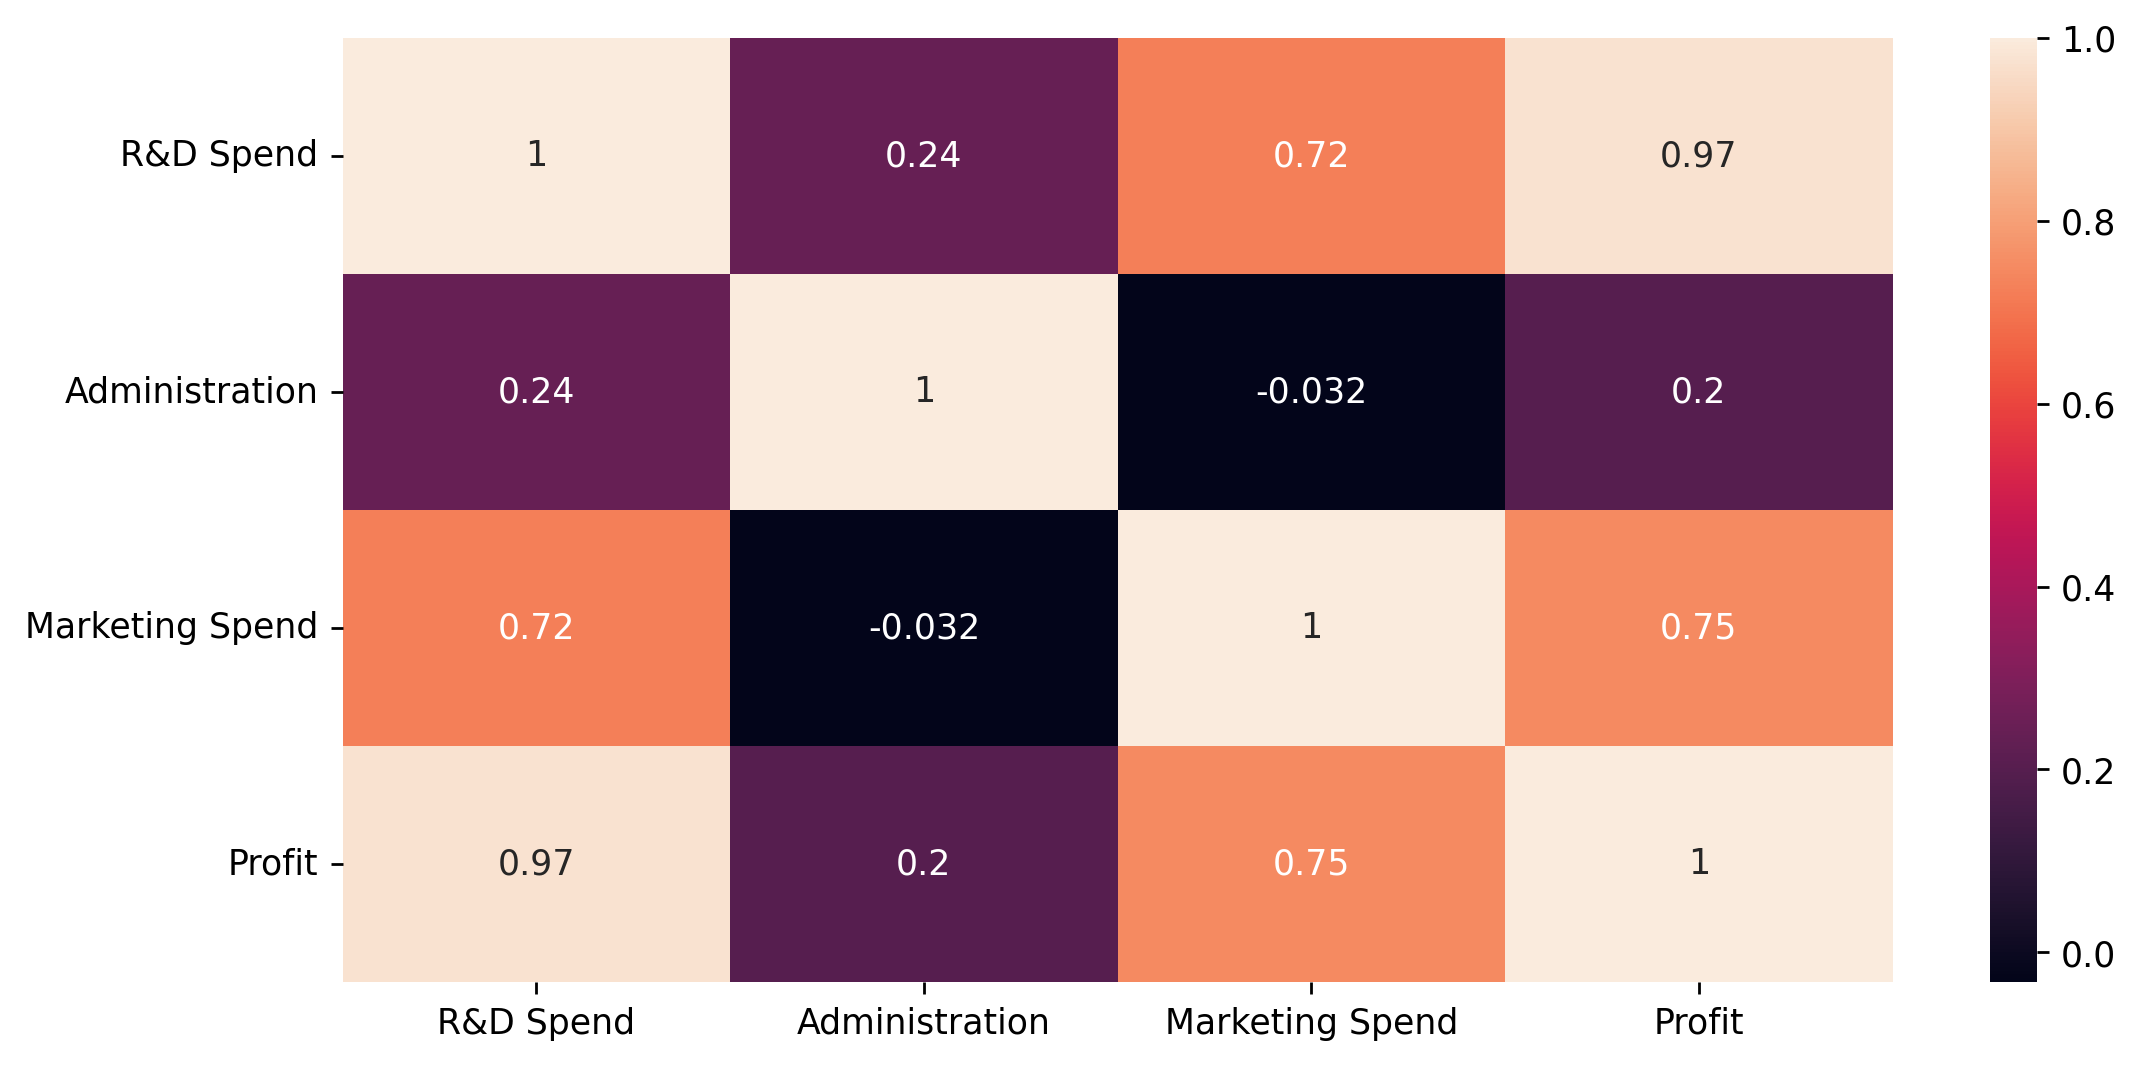

In [21]:
sns.heatmap(df.corr(), annot = True);

In [22]:
df.rename(columns ={'R&D Spend':'RD', 'Administration':'Admins', 'Marketing Spend':'Marketing'}, inplace =True)

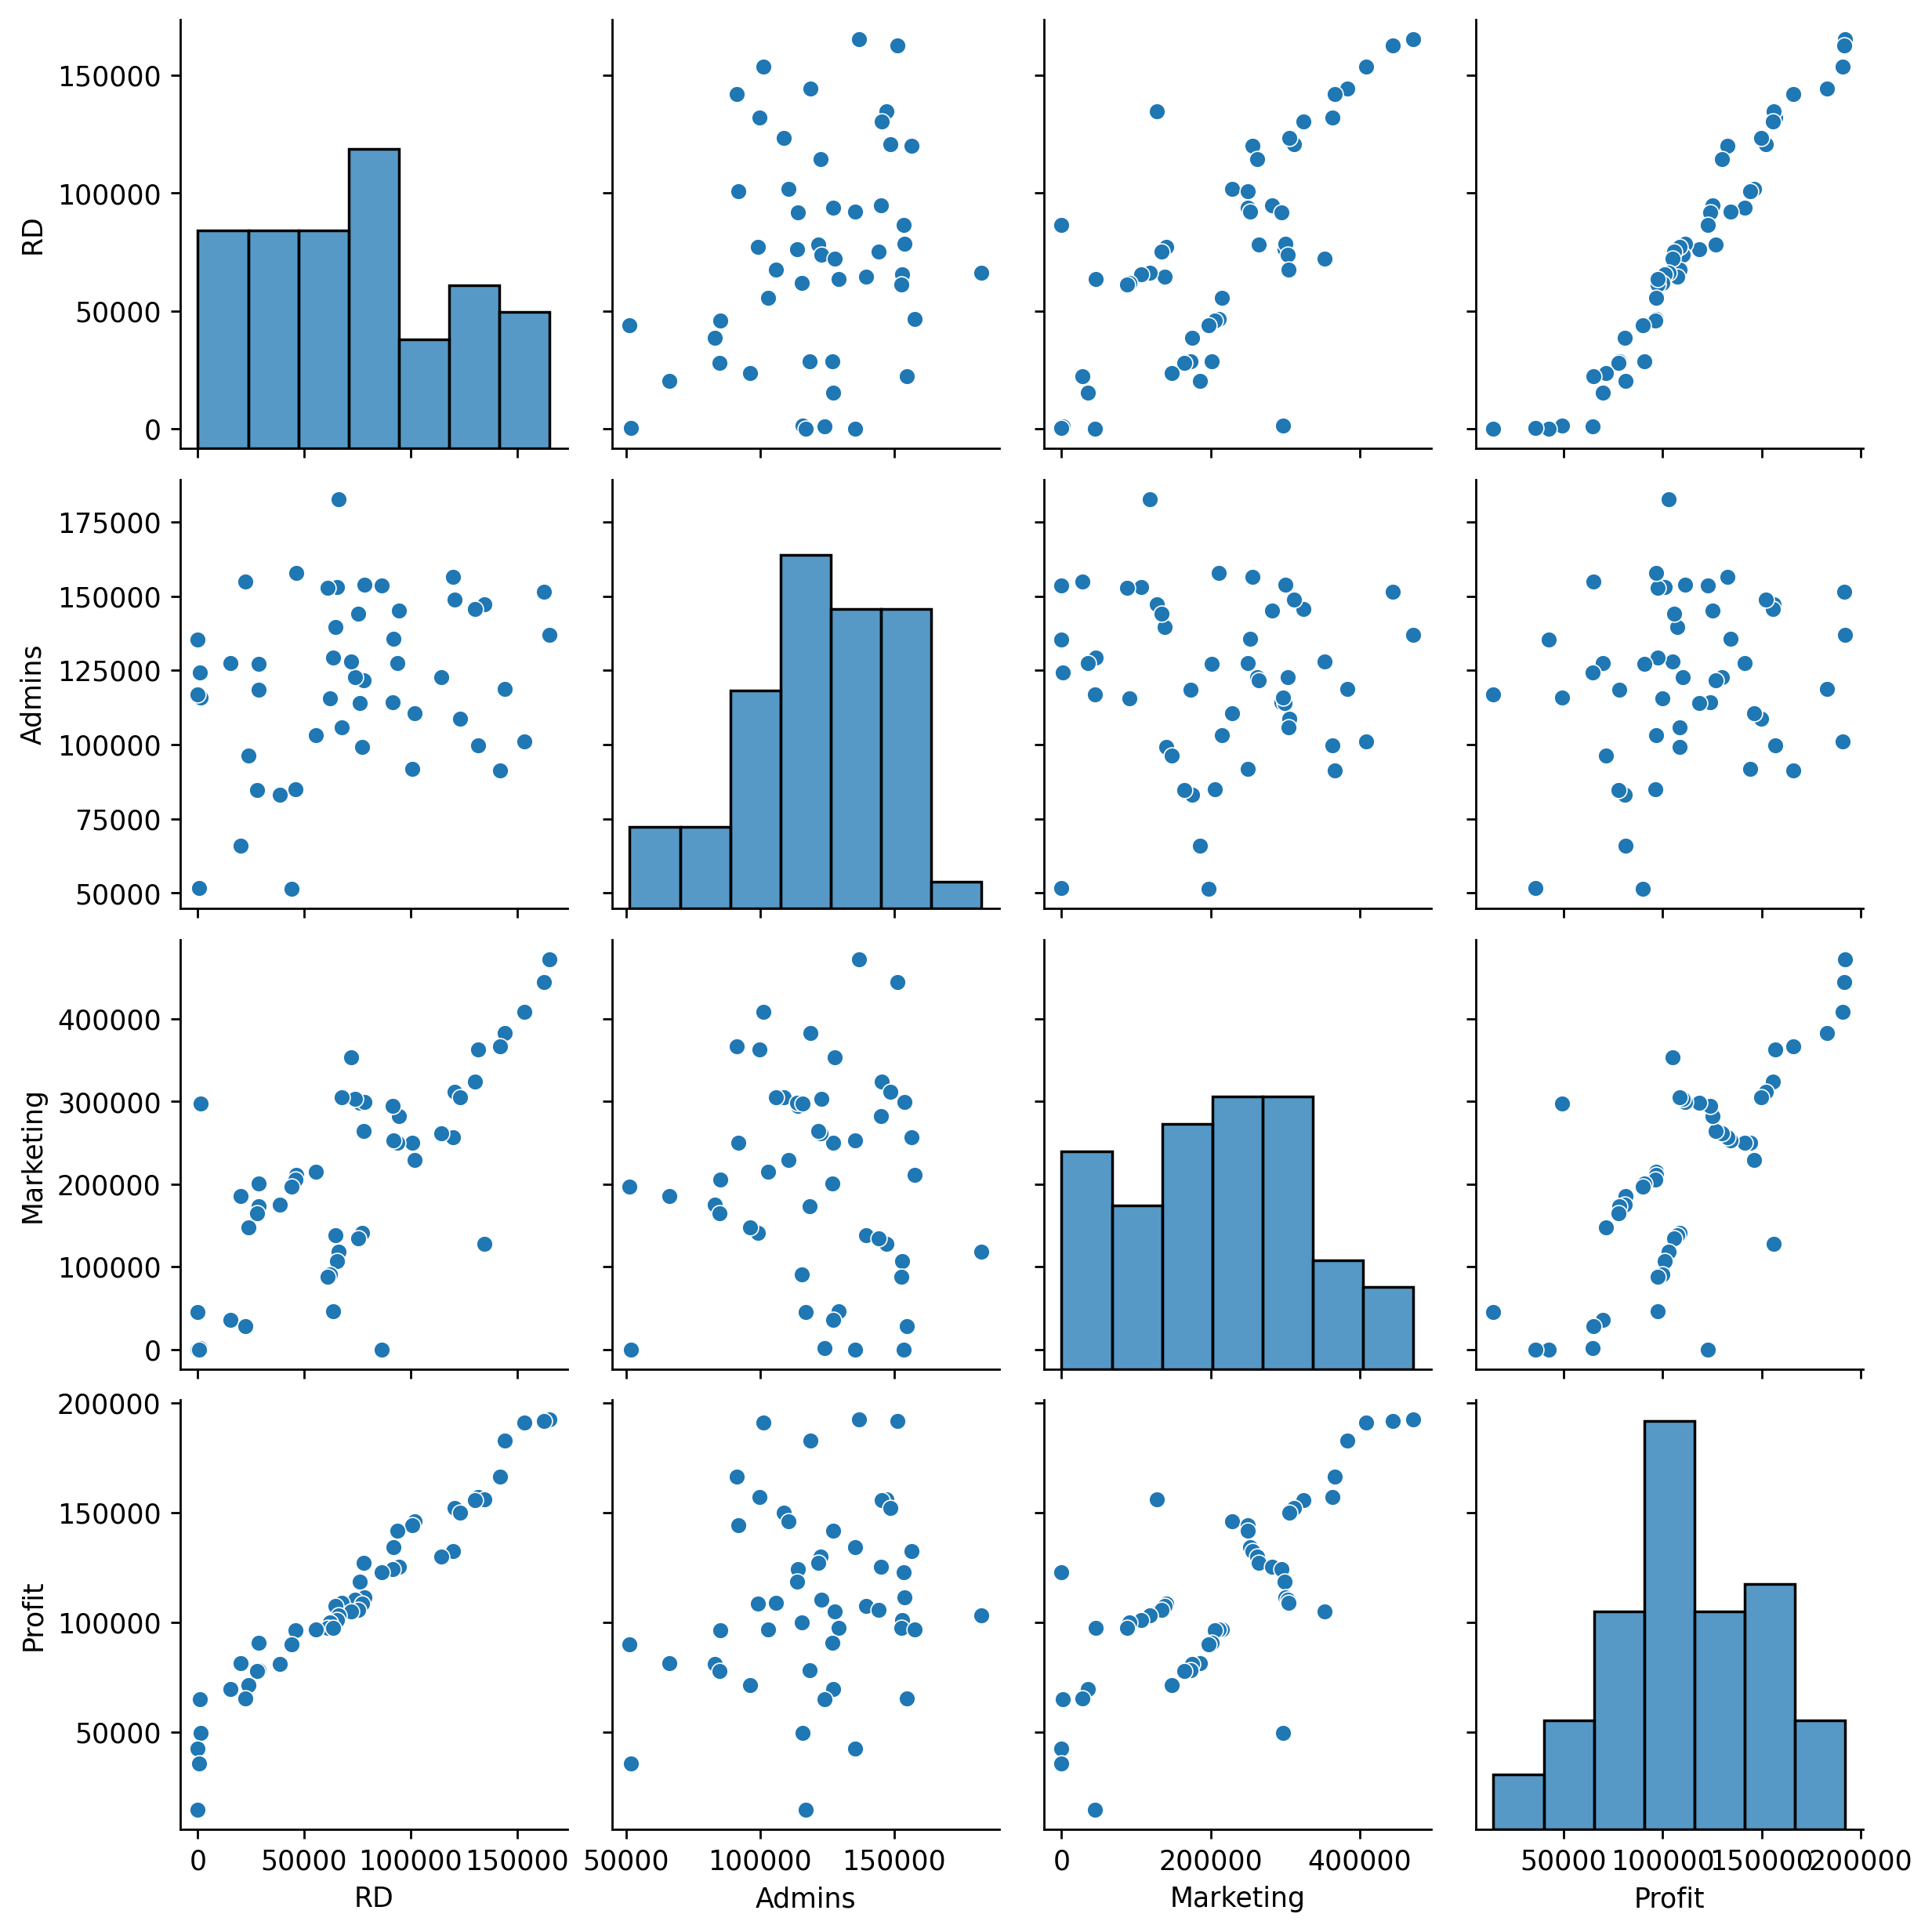

In [23]:
sns.pairplot(df);

C:\Users\sneha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


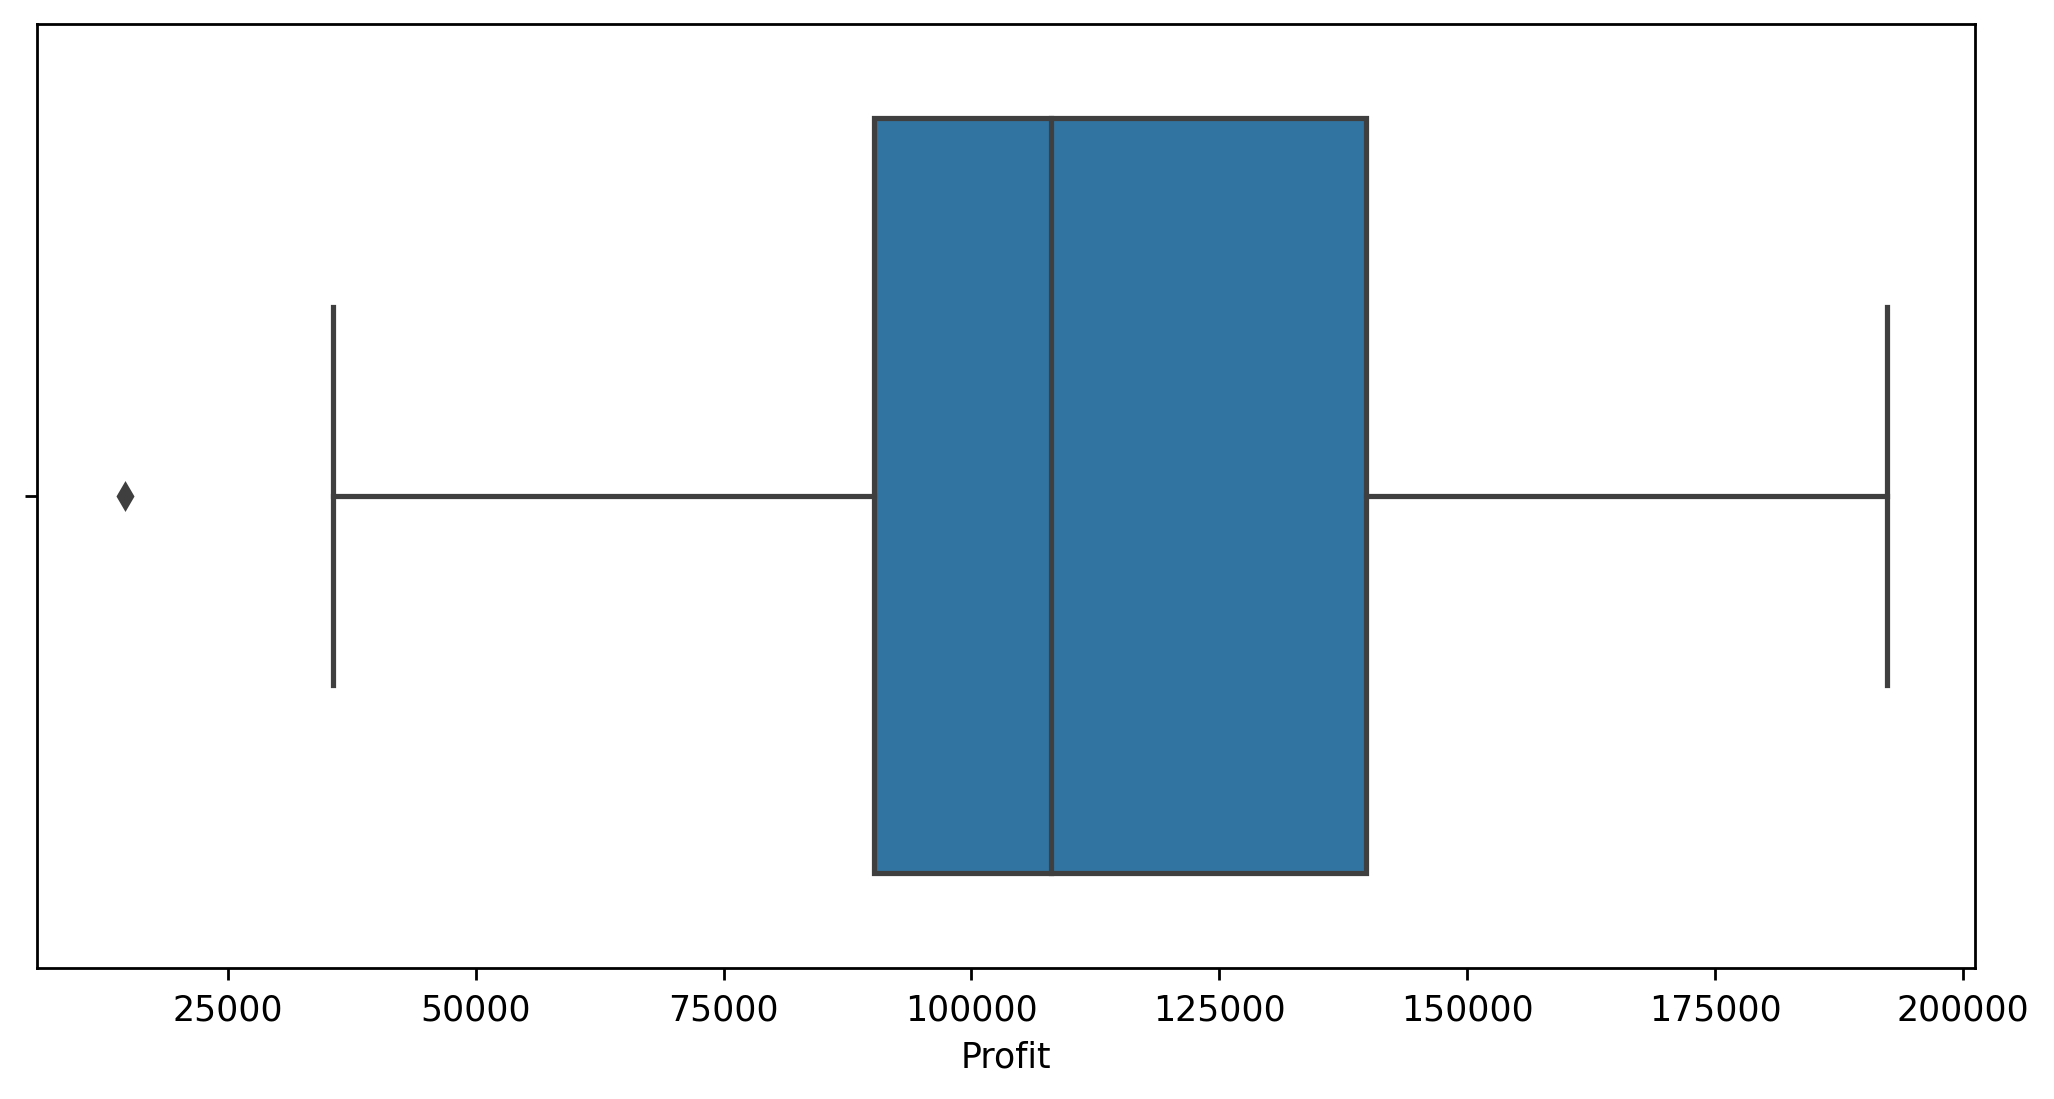

In [24]:
sns.boxplot(df['Profit']);

In [25]:
list(np.where(df.Profit < 25000))

[array([49], dtype=int64)]

In [26]:
import statsmodels.formula.api as smf

In [27]:
model = smf.ols('Profit~RD+Admins+Marketing', data = df).fit()

In [28]:
model.params

Intercept    50122.192990
RD               0.805715
Admins          -0.026816
Marketing        0.027228
dtype: float64

In [29]:
print(model.tvalues, '\n', model.pvalues)

Intercept     7.626218
RD           17.846374
Admins       -0.525507
Marketing     1.655077
dtype: float64 
 Intercept    1.057379e-09
RD           2.634968e-22
Admins       6.017551e-01
Marketing    1.047168e-01
dtype: float64


In [30]:
model.rsquared

0.9507459940683246

# Rsquared value is 95% but coefficient of admins records are not significant

In [31]:
#Linear regression

In [32]:
m1 = smf.ols('Profit~RD', data = df).fit()
m1.pvalues

Intercept    2.782697e-24
RD           3.500322e-32
dtype: float64

In [33]:
m2 = smf.ols('Profit~Admins', data = df).fit()
m2.pvalues

Intercept    0.003824
Admins       0.162217
dtype: float64

In [34]:
m3 = smf.ols('RD~Admins', data = df).fit()
m3.pvalues

Intercept    0.374157
Admins       0.090481
dtype: float64

#coefficients are not significant

In [35]:
m4 = smf.ols('Profit~Admins+RD', data = df).fit()
m4.pvalues

Intercept    5.695336e-12
Admins       2.888932e-01
RD           2.278348e-31
dtype: float64

In [36]:
m5 = smf.ols('Profit~Marketing+RD', data = df).fit()
m5.pvalues

Intercept    3.504062e-22
Marketing    6.003040e-02
RD           6.040433e-24
dtype: float64

In [43]:
df.drop(columns='State', inplace = True)

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [45]:
vif = pd.DataFrame()

In [46]:
vif['vif Factor']= [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
vif['feature']= df.columns

In [48]:
vif.round(2)

,vif Factor,feature
0,30.16,RD
1,13.40,Admins
2,9.85,Marketing
3,79.63,Profit


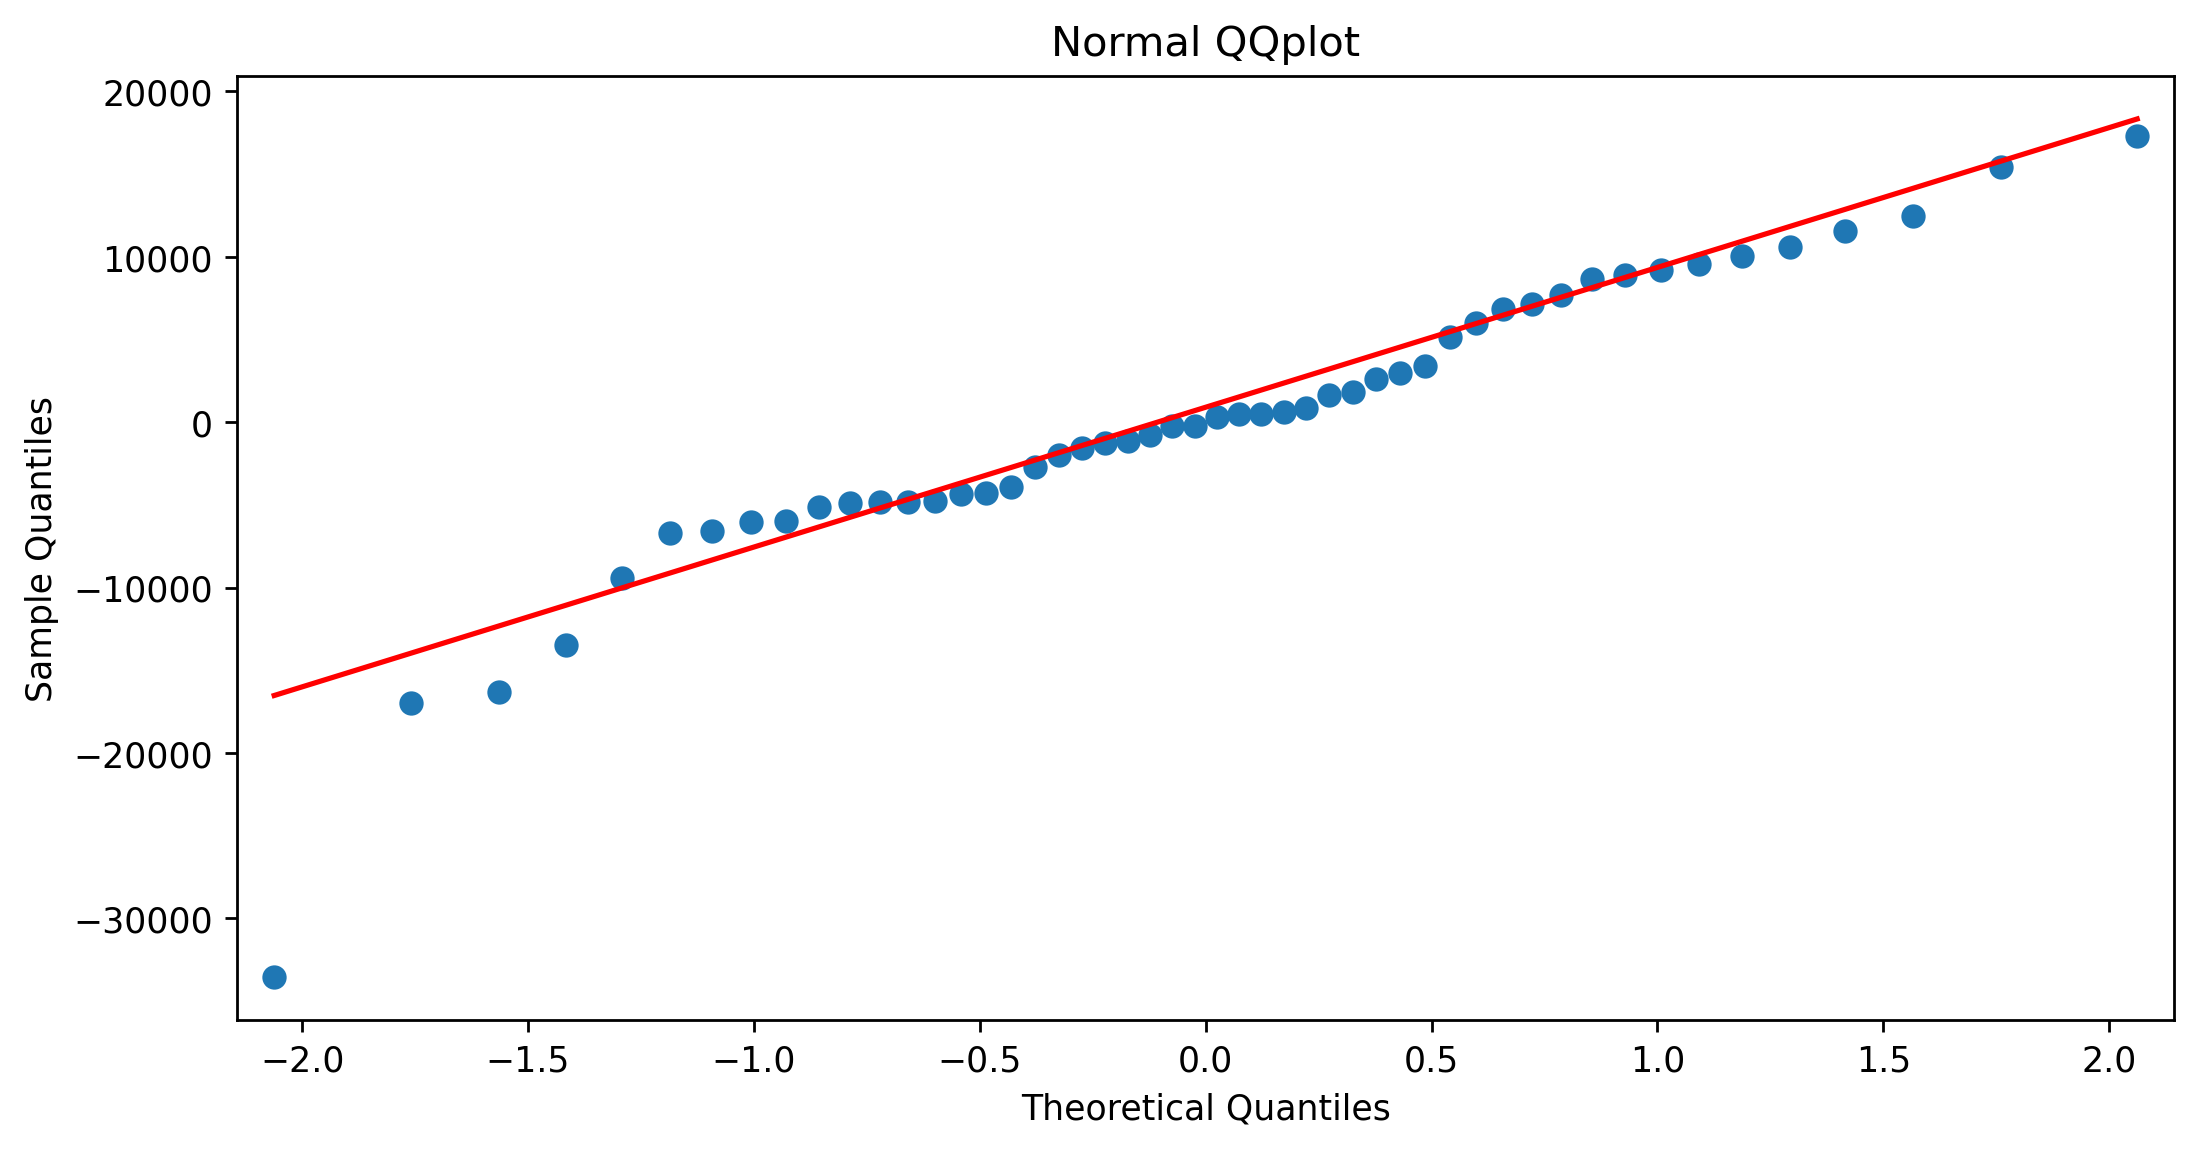

In [49]:
import statsmodels.api as sm
sm.qqplot(model.resid, line= 'q')
plt.title('Normal QQplot');

In [50]:
list(np.where(model.resid < -30000))

[array([49], dtype=int64)]

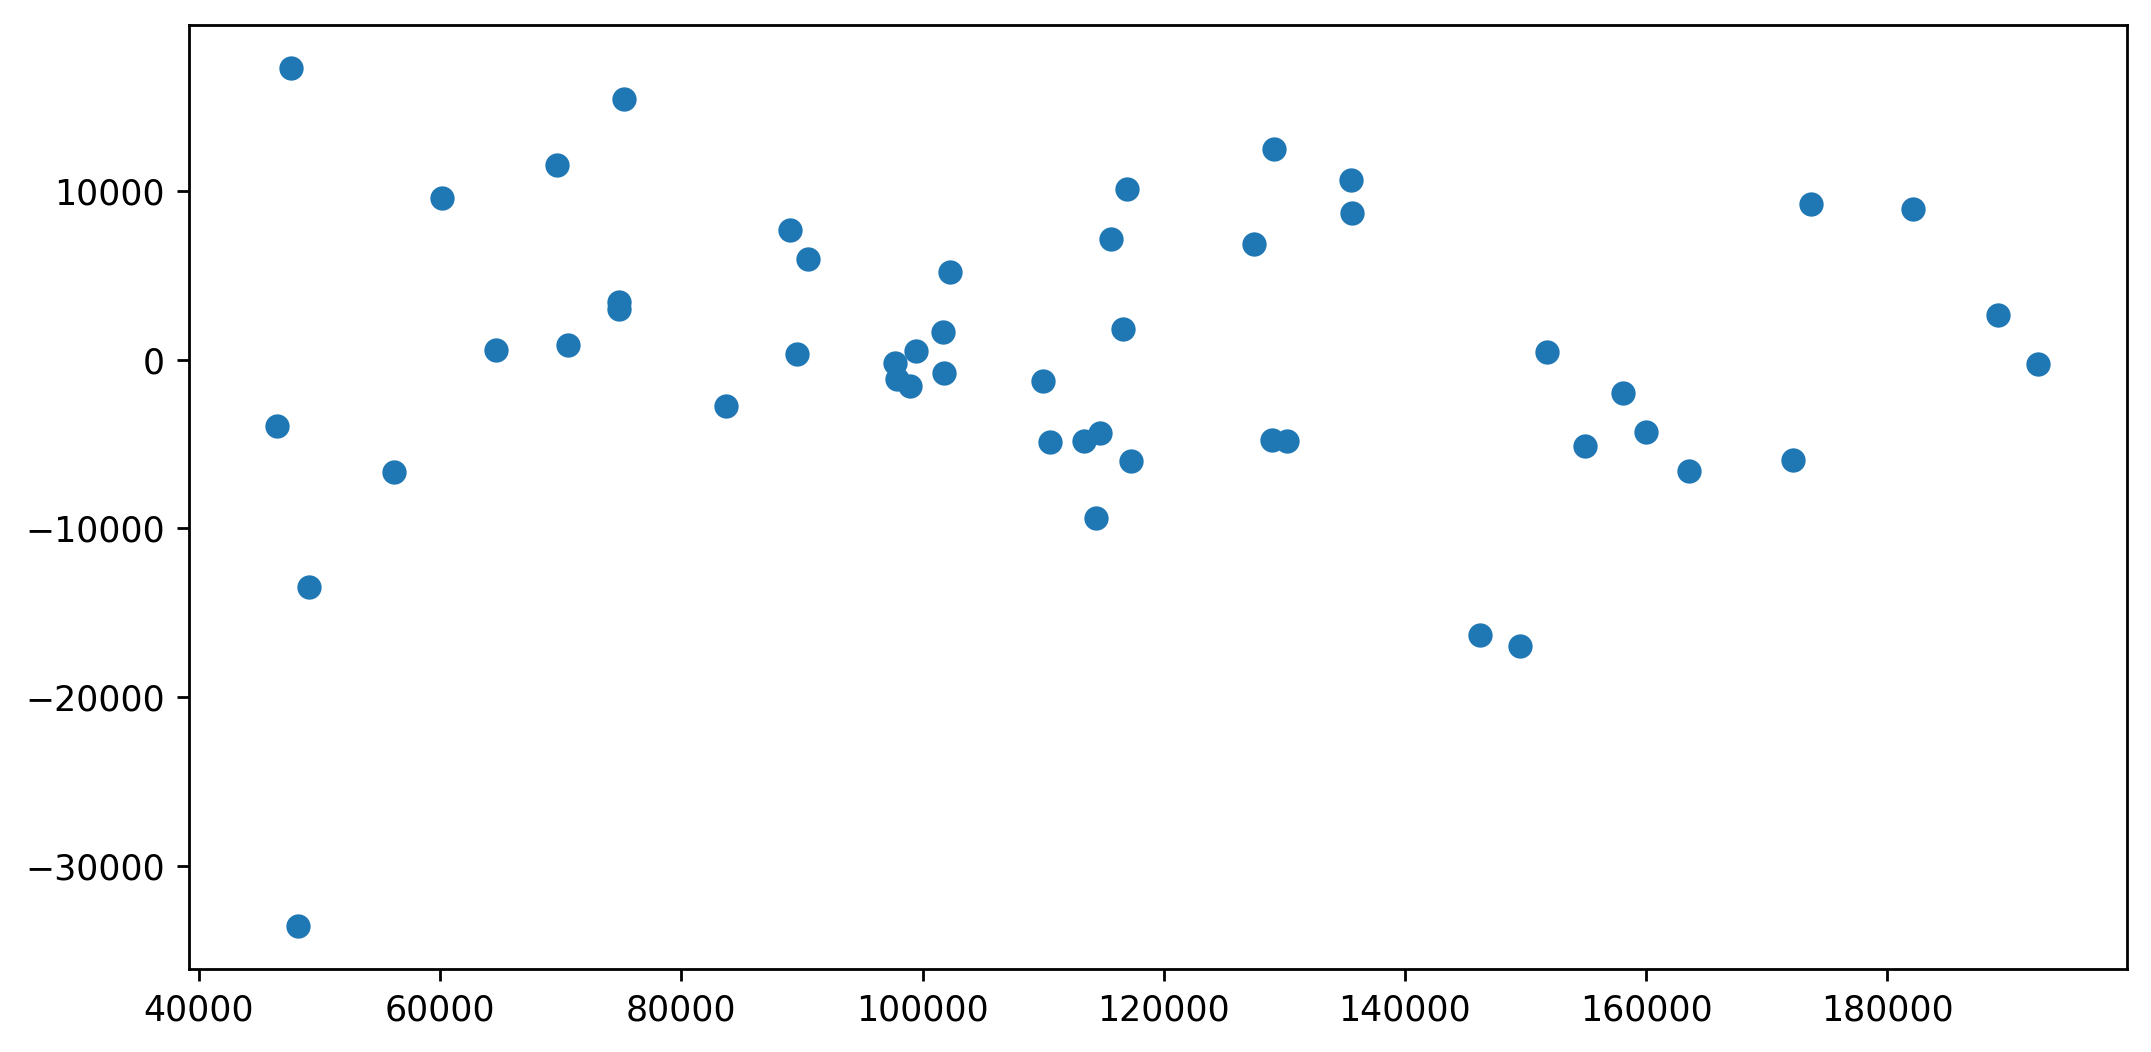

In [51]:
plt.scatter(model.fittedvalues, model.resid)

In [52]:
df1 = df.drop(df.index[[49]], axis = 0).reset_index(drop=True)

In [53]:
df.shape

(50, 4)

In [54]:
df1.shape

(49, 4)

In [70]:
df1.head(2)

,RD,Admins,Marketing,Profit
0,165349.2,136897.80,471784.10,192261.83
1,162597.7,151377.59,443898.53,191792.06


In [71]:
f_model = smf.ols('Profit~RD+Admins+Marketing', data = df1).fit()

In [72]:
f_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Sat, 17 Dec 2022   Prob (F-statistic):           8.85e-32
Time:                        01:21:33   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
RD             0.7830      0.038     20.470      0.000       0.706       0.860
Admins        -0.0222      0.043     -0.518      0.607      -0.109       0.064
Marketing      0.0252      0.014      1.825      0.075      -0.003       0.053
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

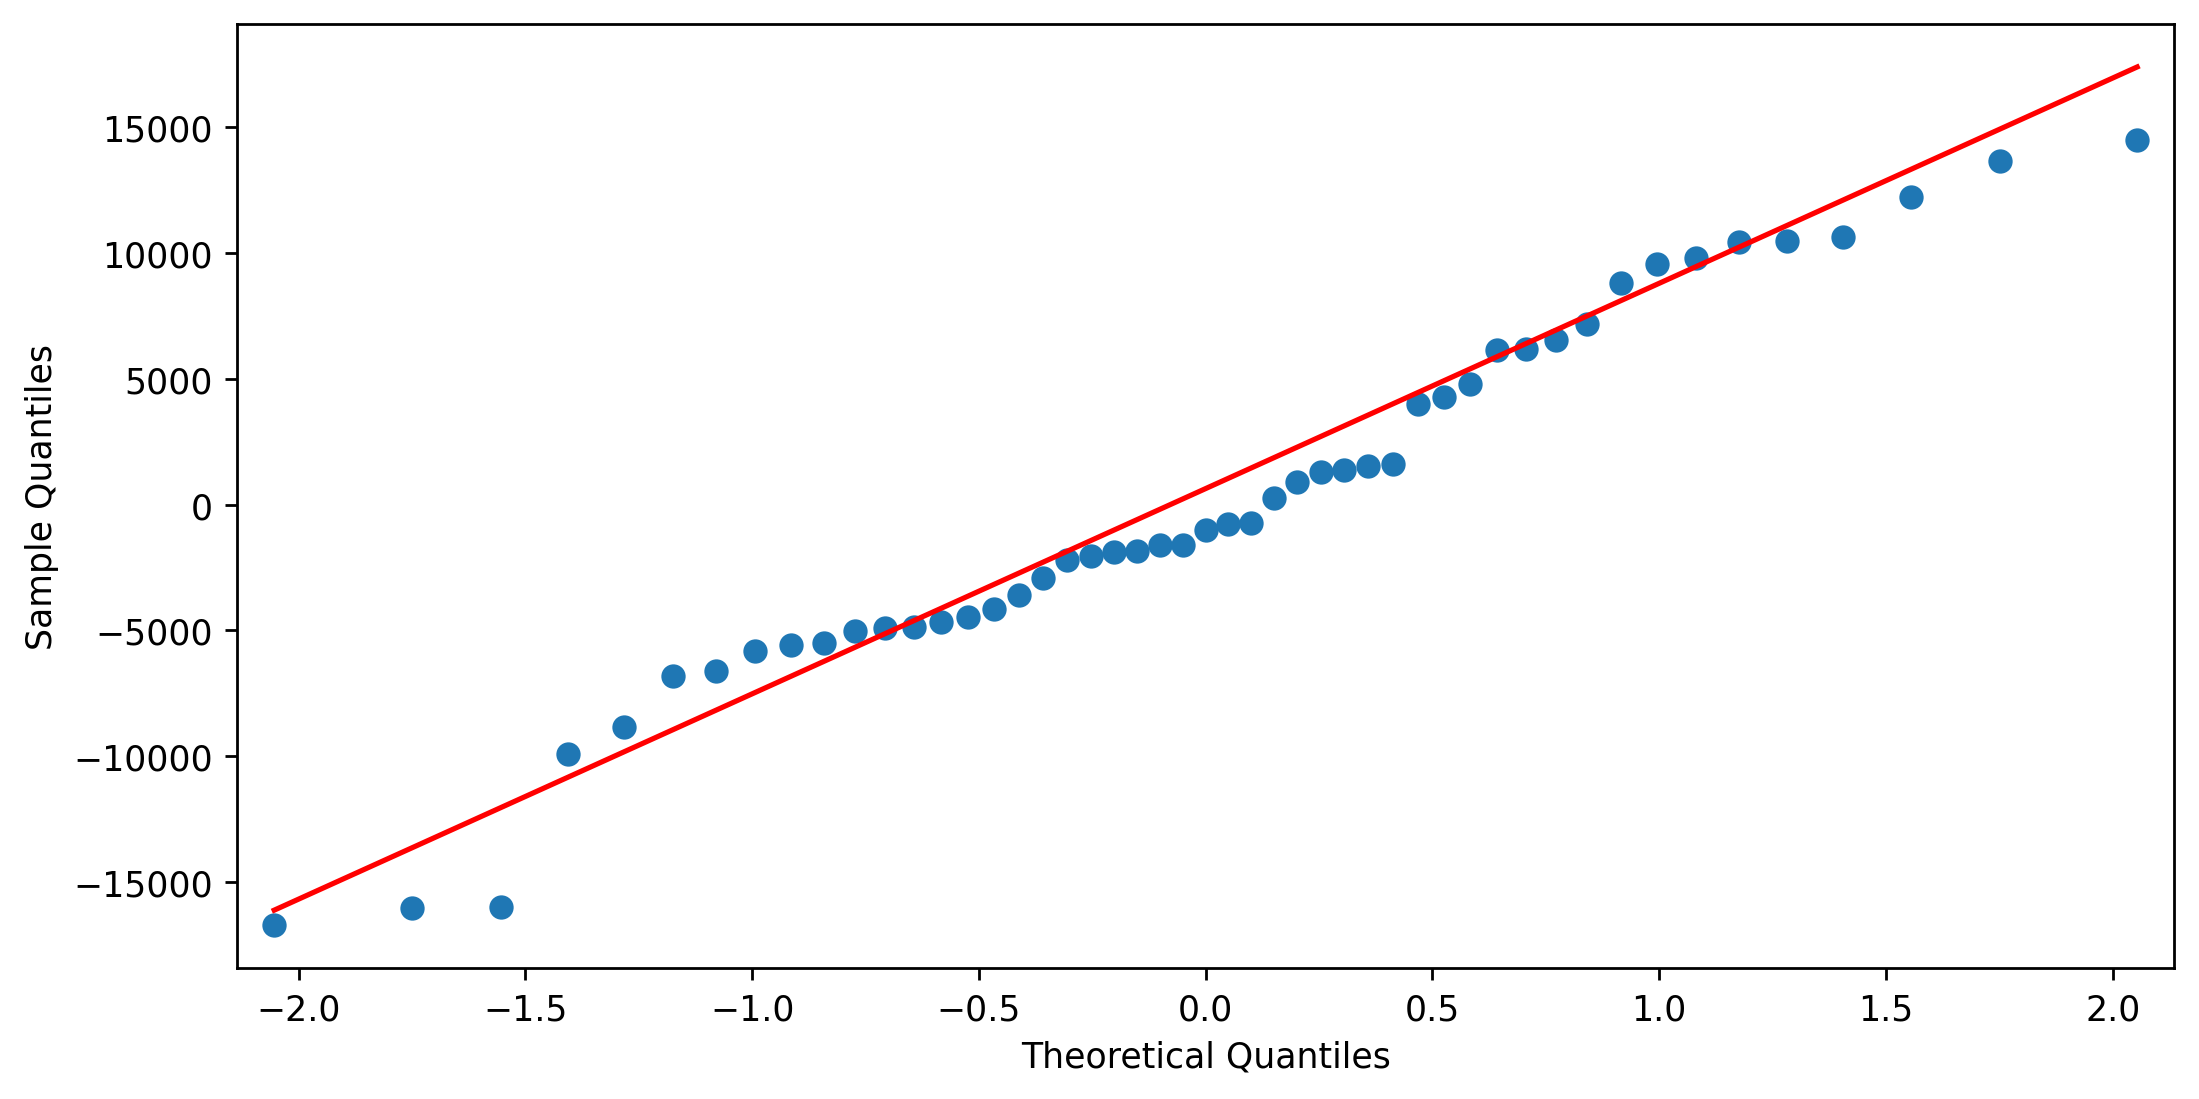

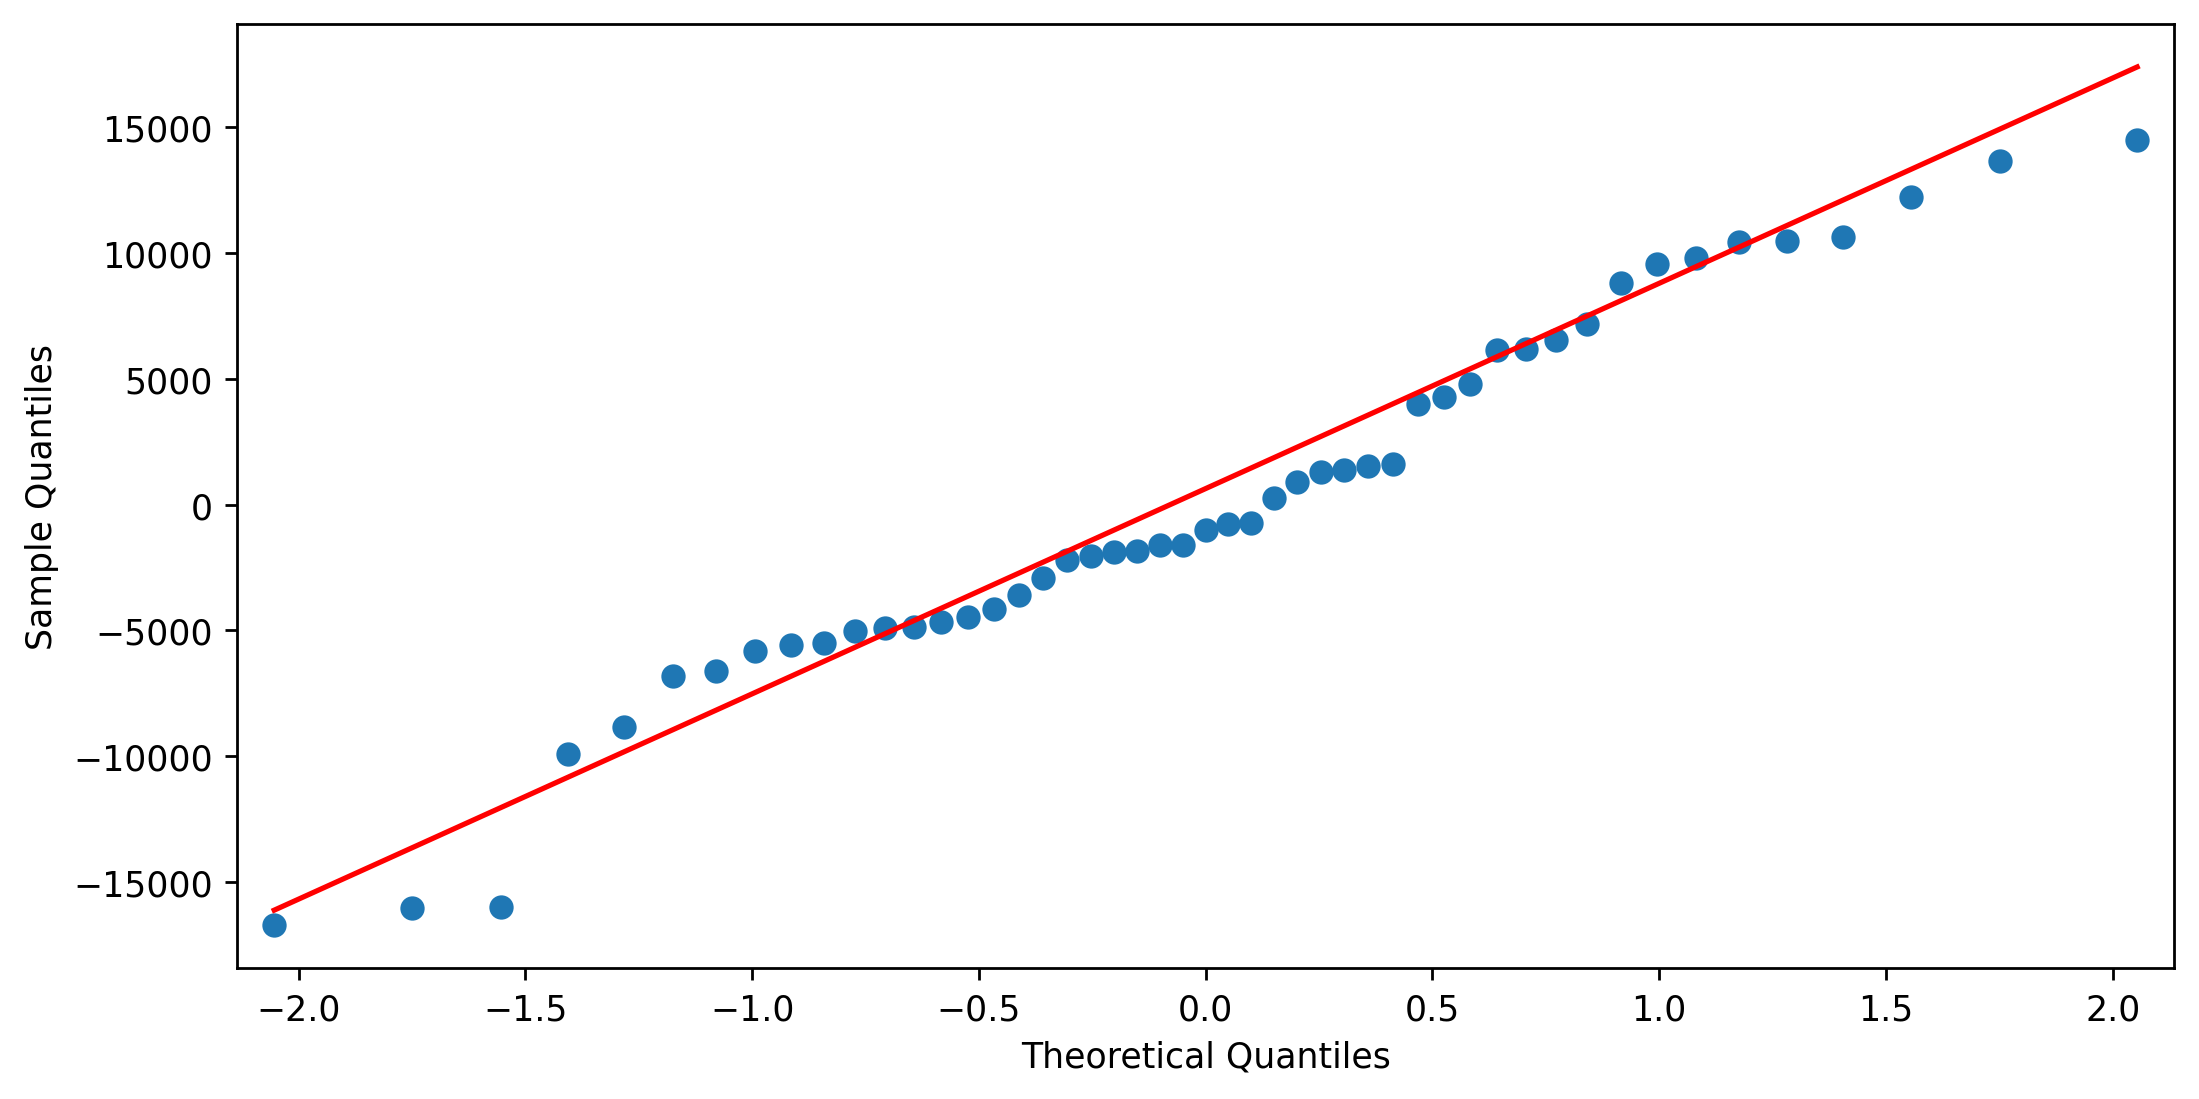

In [74]:
sm.qqplot(f_model.resid, line='q')

In [78]:
model2=smf.ols("Profit~RD+Admins+Marketing",data=df1).fit()
(c,_)=model2.get_influence().cooks_distance
c
np.argmax(c) , np.max(c)

(48, 0.39274420556321554)

In [85]:
df2 = df1.drop(df1.index[[48]], axis = 0).reset_index(drop= True)
df2.shape

(48, 4)

In [86]:
model3=smf.ols("Profit~RD+Admins+Marketing",data=df2).fit()

In [87]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     378.3
Date:                Sat, 17 Dec 2022   Prob (F-statistic):           2.03e-31
Time:                        01:32:05   Log-Likelihood:                -493.33
No. Observations:                  48   AIC:                             994.7
Df Residuals:                      44   BIC:                             1002.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    5.91e+04   5916.711      9.988      0.000    4.72e+04     7.1e+04
RD             0.7895      0.036     21.718      0.000       0.716       0.863
Admins        -0.0633      0.044     -1.442      0.156      -0.152       0.025
Marketing      0.0169      0.014      1.249      0.218      -0.010       0.044
==============================================================================
Omnibus:                        0.287   Durbin-Watson:                   1.809
Prob(Omnibus):                  0.866   Jarque-Bera (JB):                0.475
Skew:                           0.057   Prob(JB):                        0.789
Kurtosis:                       2.526   Cond. No.                     1.58e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

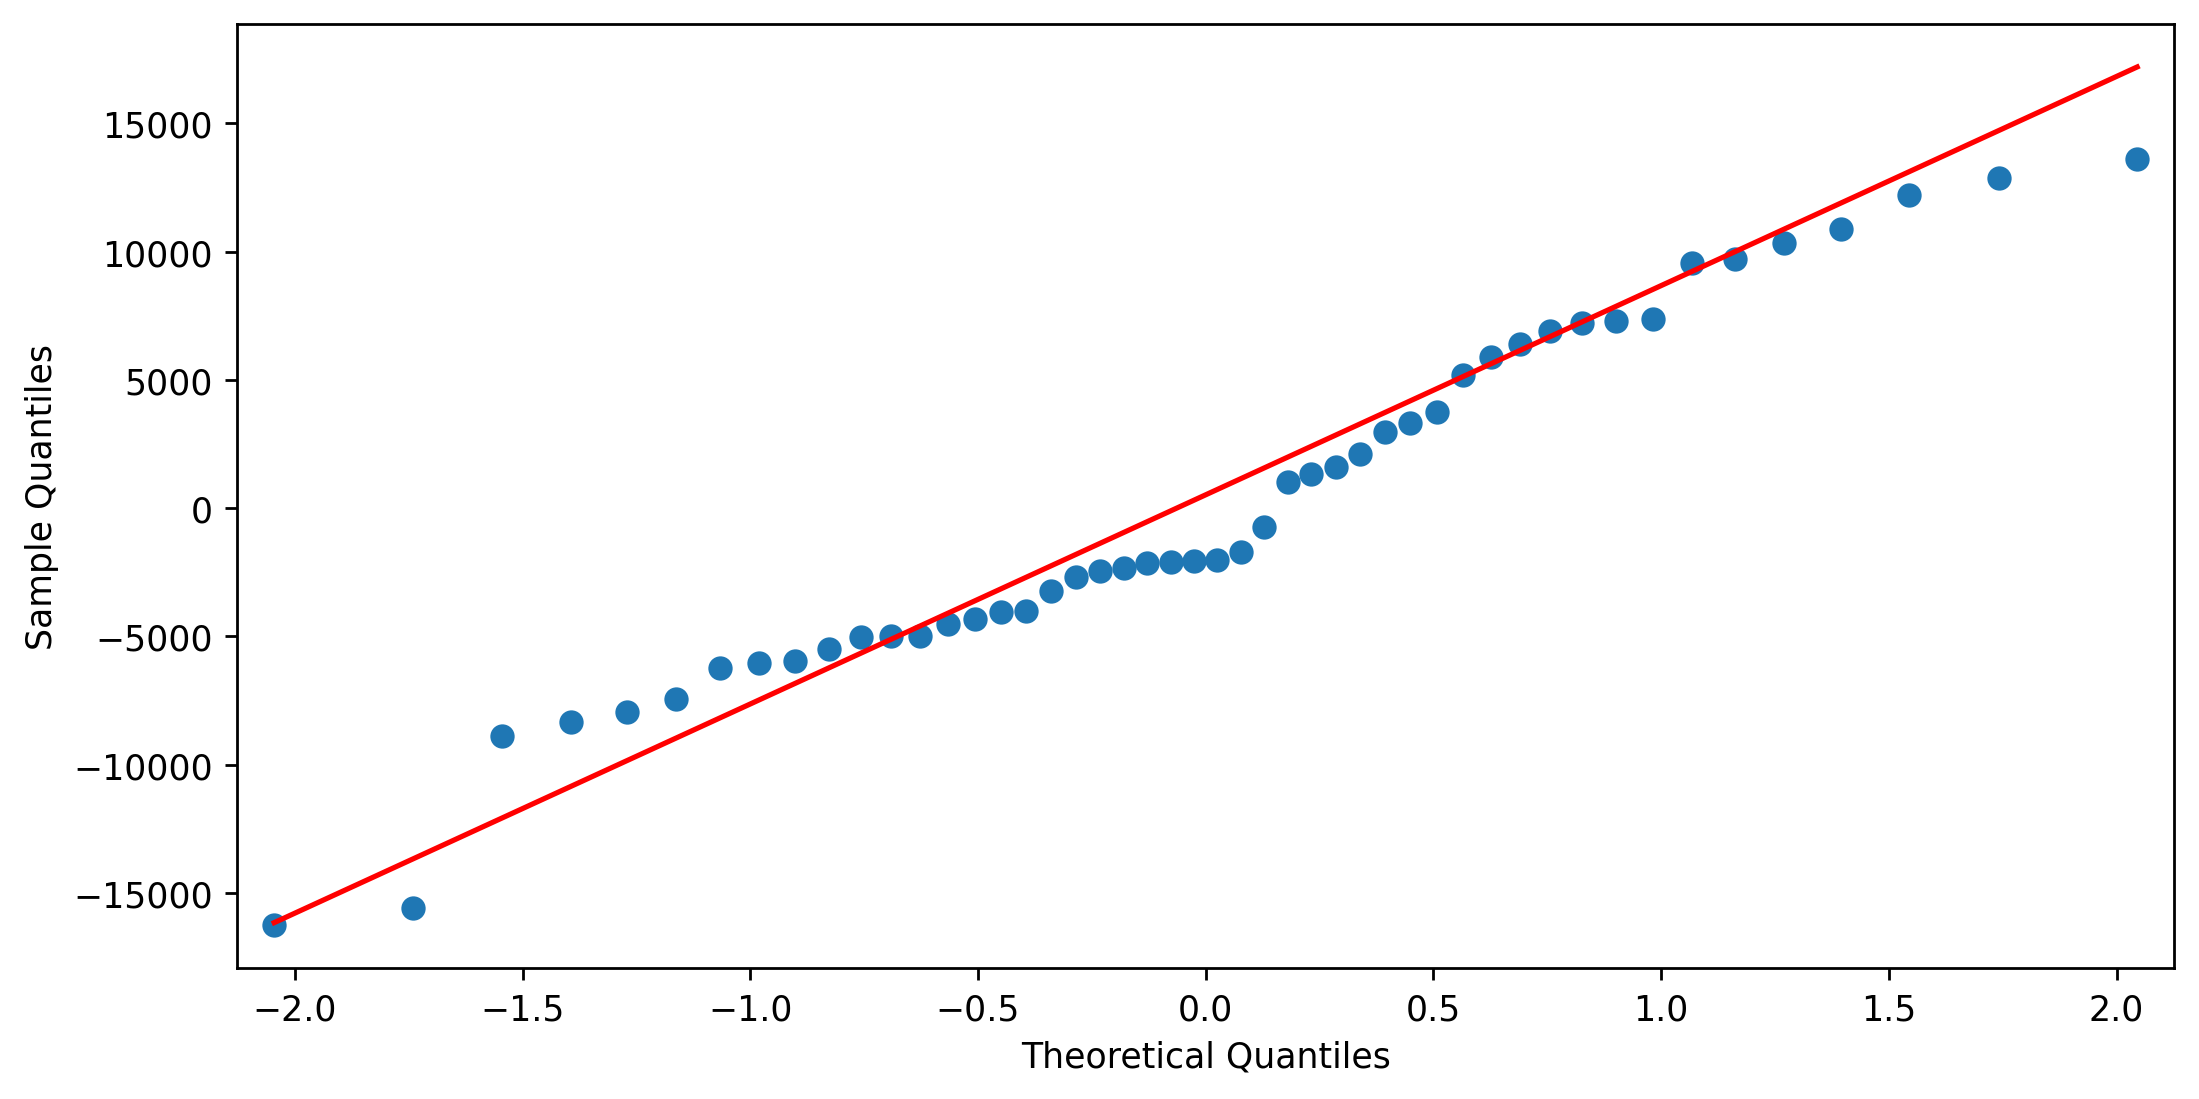

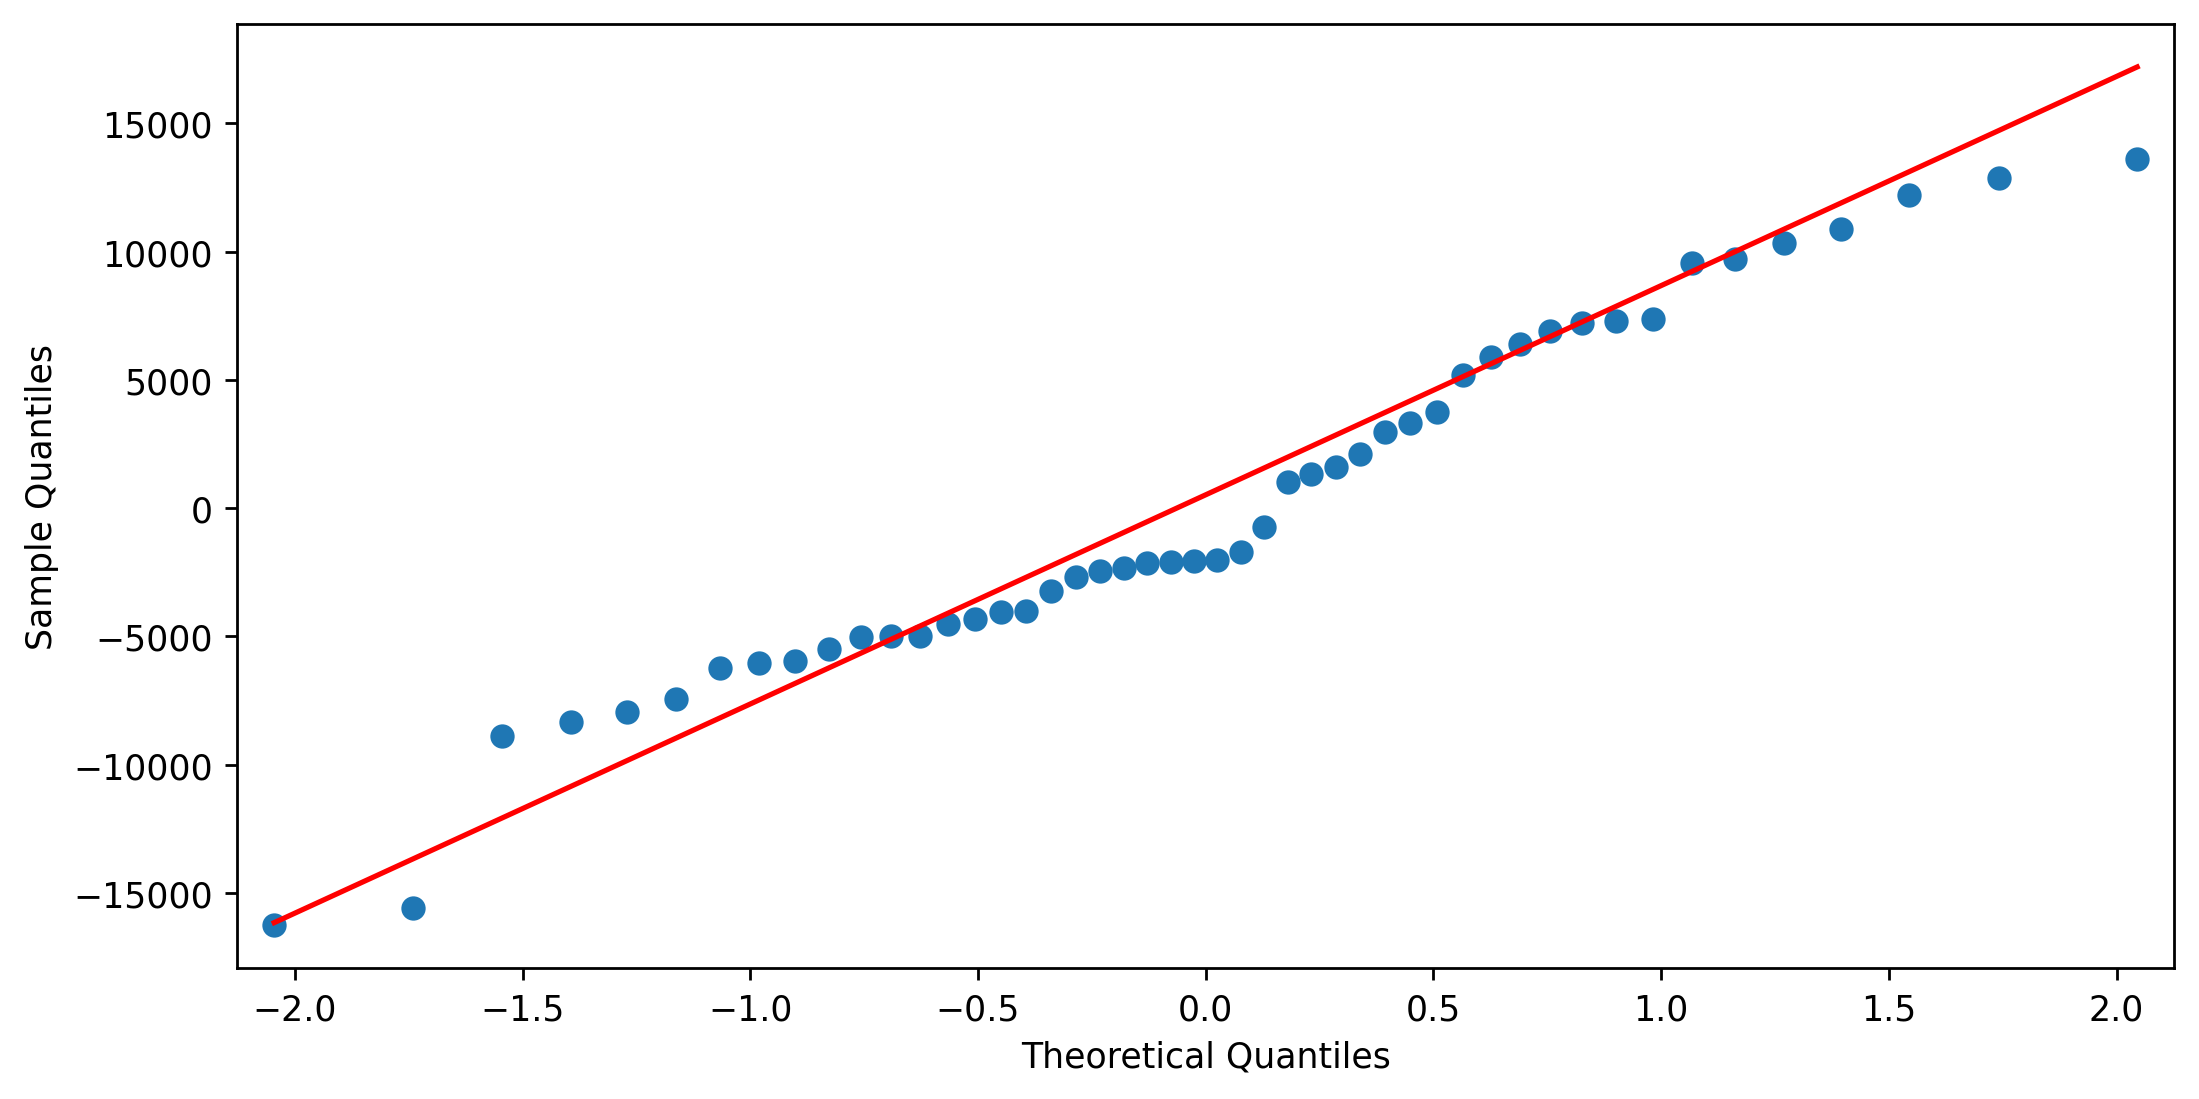

In [88]:
sm.qqplot(model3.resid, line = 'q')

In [89]:
(c,_)=model3.get_influence().cooks_distance
c
np.argmax(c) , np.max(c)

(46, 0.13829133994334772)

In [90]:
df3 = df2.drop(df2.index[[46]], axis = 0).reset_index(drop = True)

In [92]:
model4 = smf.ols("Profit~RD+Admins+Marketing",data=df3).fit()

In [93]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     357.1
Date:                Sat, 17 Dec 2022   Prob (F-statistic):           2.12e-30
Time:                        01:40:59   Log-Likelihood:                -482.62
No. Observations:                  47   AIC:                             973.2
Df Residuals:                      43   BIC:                             980.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.823e+04   5905.368      9.860      0.000    4.63e+04    7.01e+04
RD             0.7642      0.041     18.704      0.000       0.682       0.847
Admins        -0.0532      0.044     -1.202      0.236      -0.142       0.036
Marketing      0.0251      0.015      1.696      0.097      -0.005       0.055
==============================================================================
Omnibus:                        0.366   Durbin-Watson:                   1.831
Prob(Omnibus):                  0.833   Jarque-Bera (JB):                0.530
Skew:                           0.028   Prob(JB):                        0.767
Kurtosis:                       2.483   Cond. No.                     1.57e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.57e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""